In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from pandas.plotting import parallel_coordinates
 
 
df=pd.read_csv('data_1062_pd.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy
numpy.version.version

'1.18.5'

In [ ]:
df.head()

,dir_id,birads_category,pathological_class,mass_shape,mass_orientation,mass_margin,indistinct,angular,microlobulated,spiculated,echo_pattern,posterior_features,calcifications,architectural_distortion,duct_changes,skin_thickening,skin_retraction,tissue_edema,vascularity,elasticity_assessment,axillary_nodes,cyst,mass_inskin,foreign_body,nodes_inbreast,vascular_abnormalities,postsurgical_fluid,fat_necrosis
0,38,3,-1,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39,6,1,2,0,1,1,1,1,0,5,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,40,5,1,2,0,1,1,1,0,0,5,1,2,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0
3,41,6,1,2,1,1,1,1,1,1,5,1,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0
4,42,6,1,2,1,1,1,1,0,0,5,1,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0


In [ ]:
df.var()

dir_id                      291249.092216
birads_category                  2.664459
pathological_class               0.955613
mass_shape                       0.774517
mass_orientation                 0.212939
mass_margin                      0.203695
indistinct                       0.209971
angular                          0.249766
microlobulated                   0.249489
spiculated                       0.223056
echo_pattern                     0.972068
posterior_features               1.251494
calcifications                   1.384947
architectural_distortion         0.242886
duct_changes                     0.121695
skin_thickening                  0.065696
skin_retraction                  0.033658
tissue_edema                     0.024801
vascularity                      0.763047
elasticity_assessment            0.106026
axillary_nodes                   0.668109
cyst                             0.016837
mass_inskin                      0.000000
foreign_body                     0

In [ ]:

df1=df.drop(['skin_retraction','elasticity_assessment','nodes_inbreast','postsurgical_fluid','fat_necrosis','mass_inskin','foreign_body'],axis=1)

In [ ]:
df1

,dir_id,birads_category,pathological_class,mass_shape,mass_orientation,mass_margin,indistinct,angular,microlobulated,spiculated,echo_pattern,posterior_features,calcifications,architectural_distortion,duct_changes,skin_thickening,tissue_edema,vascularity,axillary_nodes,cyst,vascular_abnormalities
0,38,3,-1,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0
1,39,6,1,2,0,1,1,1,1,0,5,1,2,0,0,0,0,0,1,0,0
2,40,5,1,2,0,1,1,1,0,0,5,1,2,1,0,0,0,1,2,0,0
3,41,6,1,2,1,1,1,1,1,1,5,1,0,1,0,0,0,2,2,0,0
4,42,6,1,2,1,1,1,1,0,0,5,1,0,1,0,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1261,7,1,2,1,1,1,1,1,1,5,3,2,1,0,0,0,0,0,0,0
1058,1033,7,1,2,1,1,1,1,1,0,5,0,2,1,0,0,0,2,1,0,0
1059,1030,7,1,2,0,1,1,1,1,1,5,1,0,0,0,0,0,2,2,0,0
1060,1022,7,1,2,0,1,1,1,1,1,5,0,2,1,0,0,0,2,2,0,0


In [ ]:
df1['pathological_class'].value_counts() # +1is malignancy, -1 is benign 

 1    644
-1    418
Name: pathological_class, dtype: int64

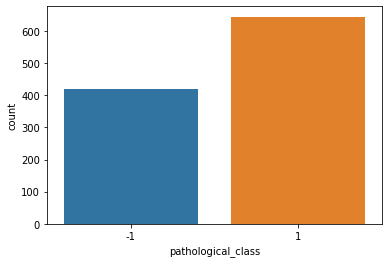

In [ ]:
sns.countplot(df1['pathological_class'],label='count')

In [ ]:
df1.dtypes

dir_id                      int64
birads_category             int64
pathological_class          int64
mass_shape                  int64
mass_orientation            int64
mass_margin                 int64
indistinct                  int64
angular                     int64
microlobulated              int64
spiculated                  int64
echo_pattern                int64
posterior_features          int64
calcifications              int64
architectural_distortion    int64
duct_changes                int64
skin_thickening             int64
tissue_edema                int64
vascularity                 int64
axillary_nodes              int64
cyst                        int64
vascular_abnormalities      int64
dtype: object

In [ ]:
df1=df1.drop(['dir_id','birads_category'],axis=1)

In [ ]:
df1_norm=normalize(df1.iloc[:,1:19])
df1_norm=pd.DataFrame(df1_norm,columns=['mass_shape', 'mass_orientation', 'mass_margin',
       'indistinct', 'angular', 'microlobulated', 'spiculated', 'echo_pattern',
       'posterior_features', 'calcifications', 'architectural_distortion',
       'duct_changes', 'skin_thickening', 'tissue_edema', 'vascularity',
       'axillary_nodes', 'cyst', 'vascular_abnormalities'])
df1_norm
CO=['mass_shape', 'mass_orientation', 'mass_margin',
       'indistinct', 'angular', 'microlobulated', 'spiculated', 'echo_pattern',
       'posterior_features', 'calcifications', 'architectural_distortion',
       'duct_changes', 'skin_thickening', 'tissue_edema', 'vascularity',
       'axillary_nodes', 'cyst', 'vascular_abnormalities']


In [ ]:
df1_norm['pathological_class']=df1['pathological_class']

In [ ]:
df1_norm

,mass_shape,mass_orientation,mass_margin,indistinct,angular,microlobulated,spiculated,echo_pattern,posterior_features,calcifications,architectural_distortion,duct_changes,skin_thickening,tissue_edema,vascularity,axillary_nodes,cyst,vascular_abnormalities,pathological_class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980581,0.196116,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-1
1,0.320256,0.000000,0.160128,0.160128,0.160128,0.160128,0.000000,0.800641,0.160128,0.320256,0.000000,0.0,0.0,0.0,0.000000,0.160128,0.0,0.0,1
2,0.304997,0.000000,0.152499,0.152499,0.152499,0.000000,0.000000,0.762493,0.152499,0.304997,0.152499,0.0,0.0,0.0,0.152499,0.304997,0.0,0.0,1
3,0.298142,0.149071,0.149071,0.149071,0.149071,0.149071,0.149071,0.745356,0.149071,0.000000,0.149071,0.0,0.0,0.0,0.298142,0.298142,0.0,0.0,1
4,0.304997,0.152499,0.152499,0.152499,0.152499,0.000000,0.000000,0.762493,0.152499,0.000000,0.152499,0.0,0.0,0.0,0.304997,0.304997,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.714286,0.428571,0.285714,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
1058,0.301511,0.150756,0.150756,0.150756,0.150756,0.150756,0.000000,0.753778,0.000000,0.301511,0.150756,0.0,0.0,0.0,0.301511,0.150756,0.0,0.0,1
1059,0.304997,0.000000,0.152499,0.152499,0.152499,0.152499,0.152499,0.762493,0.152499,0.000000,0.000000,0.0,0.0,0.0,0.304997,0.304997,0.0,0.0,1
1060,0.291730,0.000000,0.145865,0.145865,0.145865,0.145865,0.145865,0.729325,0.000000,0.291730,0.145865,0.0,0.0,0.0,0.291730,0.291730,0.0,0.0,1


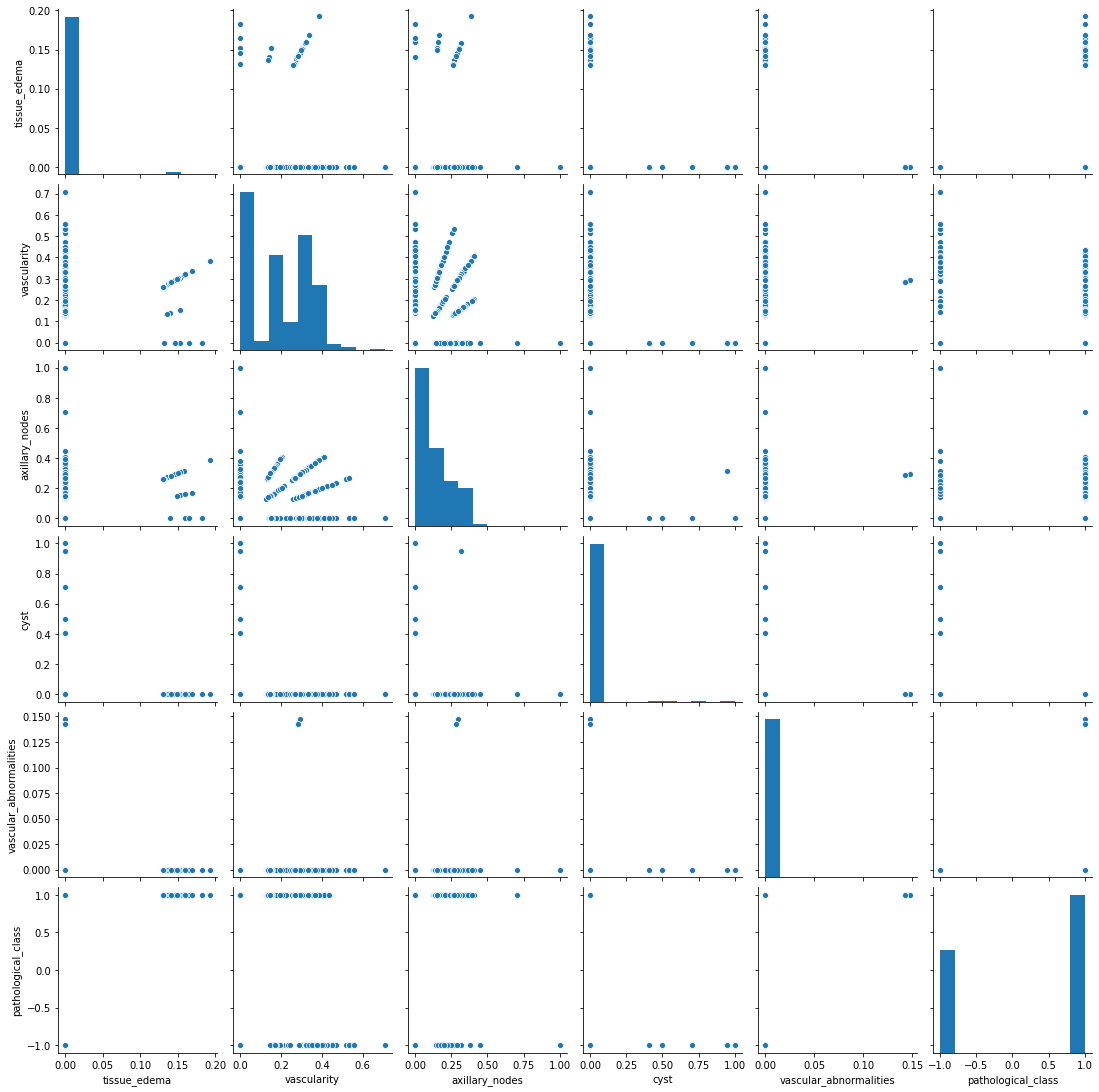

In [ ]:
sns.pairplot(df1_norm.iloc[:,13:19])


In [ ]:
df1_norm.iloc[:,1:19].corr()

,mass_orientation,mass_margin,indistinct,angular,microlobulated,spiculated,echo_pattern,posterior_features,calcifications,architectural_distortion,duct_changes,skin_thickening,tissue_edema,vascularity,axillary_nodes,cyst,vascular_abnormalities,pathological_class
mass_orientation,1.000000,0.175145,0.178825,0.216715,0.175046,0.168207,-0.155932,0.175103,-0.057881,0.153531,-0.020142,0.044572,0.034137,-0.019202,0.048417,0.018193,0.065906,0.238414
mass_margin,0.175145,1.000000,0.939079,0.563831,0.581094,0.356084,-0.371139,0.249328,0.267585,0.407694,-0.098815,0.109228,0.074053,-0.021767,0.332070,-0.143211,0.019816,0.666111
indistinct,0.178825,0.939079,1.000000,0.562363,0.618784,0.386193,-0.382640,0.243170,0.273017,0.438439,-0.101922,0.118885,0.079768,0.012759,0.360284,-0.138612,0.021741,0.710255
angular,0.216715,0.563831,0.562363,1.000000,0.558667,0.506028,-0.295734,0.249272,0.216121,0.434804,-0.132932,0.104073,0.085513,-0.046261,0.335684,-0.095950,0.041391,0.642096
microlobulated,0.175046,0.581094,0.618784,0.558667,1.000000,0.586455,-0.329291,0.245402,0.288035,0.523832,-0.144310,0.134357,-0.007499,0.015068,0.415649,-0.097411,0.041404,0.819371
spiculated,0.168207,0.356084,0.386193,0.506028,0.586455,1.000000,-0.232615,0.263093,0.158596,0.390241,-0.117027,0.121501,0.041276,-0.011789,0.300038,-0.065840,0.067773,0.563645
echo_pattern,-0.155932,-0.371139,-0.382640,-0.295734,-0.329291,-0.232615,1.000000,-0.344100,-0.448102,-0.432145,-0.117293,-0.189834,-0.075921,-0.084863,-0.411417,-0.432370,-0.026505,-0.386625
posterior_features,0.175103,0.249328,0.243170,0.249272,0.245402,0.263093,-0.344100,1.000000,0.101131,0.136617,-0.062510,0.155674,0.038384,-0.181946,0.090022,-0.091200,-0.002549,0.272924
calcifications,-0.057881,0.267585,0.273017,0.216121,0.288035,0.158596,-0.448102,0.101131,1.000000,0.228753,-0.026964,0.092840,0.035326,0.038712,0.242954,-0.063851,0.017534,0.336342
architectural_distortion,0.153531,0.407694,0.438439,0.434804,0.523832,0.390241,-0.432145,0.136617,0.228753,1.000000,-0.088787,0.169697,0.093697,0.093507,0.407680,0.025146,0.030705,0.606255


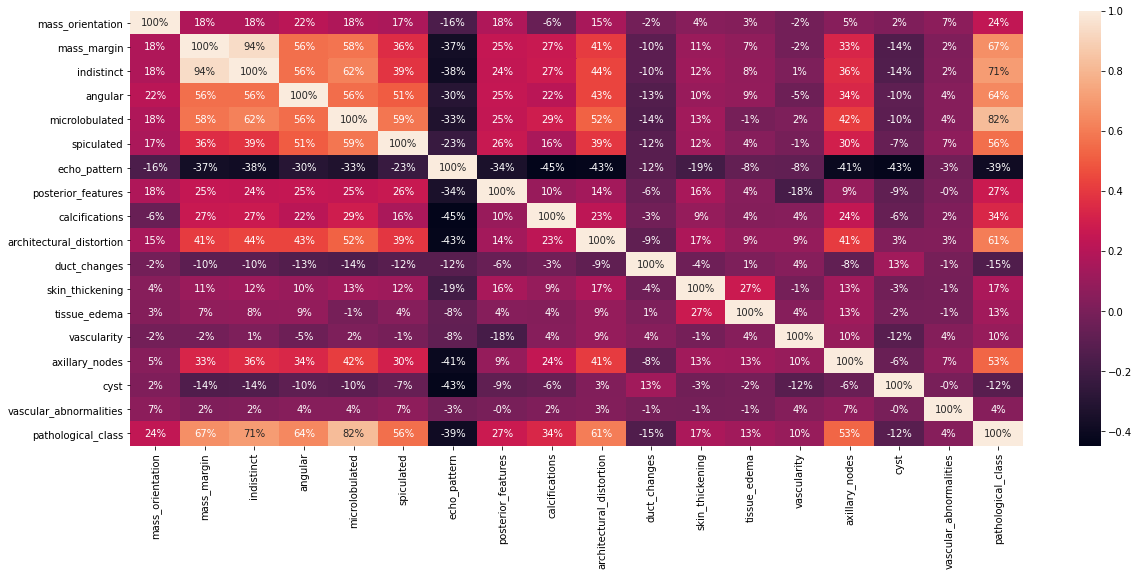

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df1_norm.iloc[:,1:19].corr(),annot=True,fmt='.0%')

In [ ]:
x=df1_norm.iloc[:,0:18].values
r= np.arange(0,x.shape[0])
c= np.arange(0,x.shape[1])
y=df1.iloc[:,1:19].values
y1=df1.iloc[:,0].values
r1= np.arange(0, y.shape[0])
c1= np.arange(0, y.shape[1])


In [ ]:
class Bicluster:
    def __init__(self, rows, cols, inverted_rows, msr):
        if isinstance(rows, np.ndarray) and isinstance(cols, np.ndarray) and isinstance(inverted_rows, np.ndarray):
            self.rows = rows
            self.cols = cols
            self.inverted_rows = inverted_rows
        else:
            raise Exception("rows, cols and inverted_rows must be np.ndarray. TIPS: np.array(rows_list) is the way.")
        self.msr = msr

    def __str__(self):
        return "Shape:{0}, {1}\tMSR:{2}".format(self.rows.size+self.inverted_rows.size, self.cols.size, self.msr)

In [ ]:
def clean(matrix, missing_value=-1):
    """
    Replace the missing value with random one's.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    missing_values : float
        Value to be considered as missing (default -1)
    Returns
    -------
    Numpy array
        missing
    """
    temp_matrix = np.copy(matrix)
    generator = np.random.RandomState(0)
    idx = np.where(temp_matrix == missing_value)
    temp_matrix[idx] = generator.randint(0, 801, len(idx[0]))
    return temp_matrix


In [ ]:
def mean_squared_residue_np(matrix, rows, cols, inverted_rows=np.array([])):
    """
    Compute the MSR(Mean Squared Residue) of the submatrix defined by rows,cols and inverted_rows over the matrix.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    rows : Numpy array
        Array of rows indexes of submatrix
    cols : Numpy array
        Array of columns indexes of submatrix
    inverted_rows : Numpy array (default np.array([]))
        Array of inverted rows indexesof submatrix
    Returns
    -------
    float
        The MSR of the submatrix
    """
    matrix2 = matrix[rows][:, cols]
    if inverted_rows.size > 0:
        matrix_inverted = np.flip(matrix[inverted_rows][:, cols], 1)
        matrix2 = np.append(matrix2, matrix_inverted, 0)

    def msr(a): return (np.power(a - a.mean(axis=1, keepdims=True) -
                                 a.mean(axis=0) + a.mean(), 2).mean())
    return msr(matrix2)


In [ ]:

def multiple_deletion_node_np(matrix, msr_threshold=5000, alpha=1.2):
    """
    Multiple deletion node on matrix.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    msr_threshold : float (default 300)
        Minimum MSR of submatrix to be considered acceptable
    alpha : float (default 1.2)
        Value of alpha
    Returns
    -------
    A tuple of Numpy array
        The rows and columns indexes of the submatrix obtained.
    """
    rows = np.arange(0, matrix.shape[0])
    cols = np.arange(0, matrix.shape[1])
    msr = mean_squared_residue_np(matrix, rows, cols)
    print("MSR before multiple_deletion_node\t" + str(msr))
    rows_mean = matrix[rows].mean(axis=1, keepdims=True)
    cols_mean = matrix[rows][:, cols].mean(axis=0)
    deletion = True
    while deletion and msr > msr_threshold:

        arr = matrix[rows][:, cols] - rows_mean - cols_mean
        arr += np.mean(matrix[rows][:, cols])
        msr_rows = np.power(arr, 2).mean(axis=1)
        rows_to_remove = msr_rows <= (alpha * msr)
        rows = rows[rows_to_remove]
        msr = mean_squared_residue_np(matrix, rows, cols)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)

        cols_to_remove = np.array([])
        if matrix.shape[1] > 100:
            arr = matrix[rows][:, cols] - rows_mean - cols_mean
            arr += np.mean(matrix[rows][:, cols])
            msr_cols = np.power(arr, 2).mean(axis=0)
            cols_to_remove = msr_cols <= (alpha * msr)
            cols = cols[cols_to_remove]
            msr = mean_squared_residue_np(matrix, rows, cols)
            rows_mean = matrix[rows].mean(axis=1, keepdims=True)
            cols_mean = matrix[rows][:, cols].mean(axis=0)
        elements_removed = np.count_nonzero(
            rows_to_remove == False) + np.count_nonzero(cols_to_remove == False)

        if(elements_removed == 0):
            deletion = False

    print("MSR after multiple_deletion_node\t" + str(msr))
    return rows, cols

In [ ]:
def single_deletion_node_np(matrix, rows, cols, msr_threshold=5000):
    """
    Single deletion node on submatrix defined by rows and cols.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    rows : Numpy array
        Array of rows indexes of submatrix
    cols : Numpy array
        Array of columns indexes of submatrix
    msr_threshold : float (default 300)
        Minimum MSR of submatrix to be considered acceptable
    Returns
    -------
    A tuple of Numpy array
        The rows and columns indexes of the submatrix obtained.
    """
    msr = mean_squared_residue_np(matrix, rows, cols)
    print("MSR before single_deletion_node\t\t" + str(msr))
    rows_mean = matrix[rows].mean(axis=1, keepdims=True)
    cols_mean = matrix[rows][:, cols].mean(axis=0)
    while msr > msr_threshold:

        arr = matrix[rows][:, cols] - rows_mean - cols_mean
        arr += np.mean(matrix[rows][:, cols])
        msr_rows = np.power(arr, 2).mean(axis=1)
        msr_cols = np.power(arr, 2).mean(axis=0)
        rows_max = np.amax(msr_rows)
        cols_max = np.amax(msr_cols)
        if rows_max > cols_max:
            rows = np.delete(rows, np.argmax(msr_rows))
        else:
            cols = np.delete(cols, np.argmax(msr_cols))
        msr = mean_squared_residue_np(matrix, rows, cols)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)

    print("MSR after single_deletion_node\t\t" + str(msr))
    return rows, cols


In [ ]:
def single_deletion_node_np(matrix, rows, cols, msr_threshold=5000):
    """
    Single deletion node on submatrix defined by rows and cols.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    rows : Numpy array
        Array of rows indexes of submatrix
    cols : Numpy array
        Array of columns indexes of submatrix
    msr_threshold : float (default 300)
        Minimum MSR of submatrix to be considered acceptable
    Returns
    -------
    A tuple of Numpy array
        The rows and columns indexes of the submatrix obtained.
    """
    msr = mean_squared_residue_np(matrix, rows, cols)
    print("MSR before single_deletion_node\t\t" + str(msr))
    rows_mean = matrix[rows].mean(axis=1, keepdims=True)
    cols_mean = matrix[rows][:, cols].mean(axis=0)
    while msr > msr_threshold:

        arr = matrix[rows][:, cols] - rows_mean - cols_mean
        arr += np.mean(matrix[rows][:, cols])
        msr_rows = np.power(arr, 2).mean(axis=1)
        msr_cols = np.power(arr, 2).mean(axis=0)
        rows_max = np.amax(msr_rows)
        cols_max = np.amax(msr_cols)
        if rows_max > cols_max:
            rows = np.delete(rows, np.argmax(msr_rows))
        else:
            cols = np.delete(cols, np.argmax(msr_cols))
        msr = mean_squared_residue_np(matrix, rows, cols)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)

    print("MSR after single_deletion_node\t\t" + str(msr))
    return rows, cols


In [ ]:
def node_addition_np(matrix, rows, cols):
    """
    Node addition on submatrix defined by rows and cols.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    rows : Numpy array
        Array of rows indexes of submatrix
    cols : Numpy array
        Array of columns indexes of submatrix
    Returns
    -------
    A tuple of Numpy array
        The rows and columns indexes of the submatrix obtained.
    """
    inverted_rows = np.array([])
    matrix_rows = np.arange(0, matrix.shape[0])
    matrix_cols = np.arange(0, matrix.shape[1])
    msr = mean_squared_residue_np(matrix, rows, cols)
    print("MSR before node_addition\t\t" + str(msr))
    rows_mean = matrix[rows].mean(axis=1, keepdims=True)
    cols_mean = matrix[rows][:, cols].mean(axis=0)
    rows_not = np.setdiff1d(matrix_rows, rows)
    cols_not = np.setdiff1d(matrix_cols, cols)
    rows_mean_not = matrix[rows_not].mean(axis=1, keepdims=True)
    cols_mean_not = matrix[rows][:, cols_not].mean(axis=0)
    addition = True
    while addition:

        arr = matrix[rows_not][:, cols] - rows_mean_not - cols_mean
        arr += np.mean(matrix[rows][:, cols])  # dubbio
        msr_rows = np.power(arr, 2).mean(axis=1)
        rows_to_append = msr_rows < msr
        rows = np.append(rows, rows_not[rows_to_append])
        rows_not = np.setdiff1d(rows_not, rows_not[rows_to_append])
        msr = mean_squared_residue_np(matrix, rows, cols, inverted_rows)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)
        rows_mean_not = matrix[rows_not].mean(axis=1, keepdims=True)
        cols_mean_not = matrix[rows][:, cols_not].mean(axis=0)

        arr = matrix[rows][:, cols_not] - rows_mean - cols_mean_not
        arr += np.mean(matrix[rows][:, cols])  # dubbio
        msr_cols = np.power(arr, 2).mean(axis=0)
        cols_to_append = msr_cols < msr
        cols = np.append(cols, cols_not[cols_to_append])
        cols_not = np.setdiff1d(cols_not, cols_not[cols_to_append])
        msr = mean_squared_residue_np(matrix, rows, cols, inverted_rows)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)

        arr = -matrix[rows_not][:, cols] + rows_mean_not - cols_mean
        arr += np.mean(matrix[rows][:, cols])  # dubbio
        msr_rows = np.power(arr, 2).mean(axis=1)
        rows_to_append = msr_rows < msr
        if(inverted_rows.size == 0):
            inverted_rows = rows_not[rows_to_append]
        else:
            inverted_rows = np.append(inverted_rows, rows_not[rows_to_append])
        rows_not = np.setdiff1d(rows_not, rows_not[rows_to_append])
        msr = mean_squared_residue_np(matrix, rows, cols, inverted_rows)
        rows_mean = matrix[rows].mean(axis=1, keepdims=True)
        cols_mean = matrix[rows][:, cols].mean(axis=0)
        rows_mean_not = matrix[rows_not].mean(axis=1, keepdims=True)
        cols_mean_not = matrix[rows][:, cols_not].mean(axis=0)

        elements_removed = np.count_nonzero(
            rows_to_append == True) + np.count_nonzero(cols_to_append == True)

        if(elements_removed == 0):
            addition = False

    print("MSR after node_addition\t\t\t" + str(msr))
    return rows, cols, inverted_rows, msr


In [ ]:
def hide_bicluster_np(matrix, rows, cols, inverted_rows=np.array([])):
    """
    Mask the submatrix defined by rows, cols and inverted_rows on matrix with random values.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    rows : Numpy array
        Array of rows indexes of submatrix
    cols : Numpy array
        Array of columns indexes of submatrix
    inverted_rows : Numpy array (default np.array([]))
        Array of inverted rows indexesof submatrix
    Returns
    -------
    Numpy array
        A copy of matrix in which submatrix has been masked.
    """
    matrix2 = np.copy(matrix)
    generator = np.random.RandomState(0)
    for row in rows:
        matrix2[row, cols] = generator.randint(0, 801, cols.size)
        # print matrix2[row,cols]
    if inverted_rows.size > 0:
        for row in inverted_rows:
            matrix2[row, cols] = generator.randint(0, 801, cols.size)
    print("Last bicluster masked")
    return matrix2

In [ ]:
def get_bicluster(matrix, bicluster):
    """
    Get a submatrix given rows,columns and inveted rows indexes.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    bicluster : Bicluster object 
    Returns
    -------
    Numpy array
        Submatrix.
    """
    rows = np.append(bicluster.rows, bicluster.inverted_rows)
    cols = bicluster.cols
    rows.sort()
    cols.sort()
    return matrix[rows][:, cols],rows,cols


In [ ]:
def plot_bicluster(matrix, bicluster, name="Bicluster"):
    """
    Plot a bicluster.
    Parameters
    ----------
    matrix: Numpy array
        Starting values matrix.
    bicluster : Bicluster object
        Bicluster to plot
    name : string (default "Bicluster")
        Name of plotted bicluster.
    Returns
    -------
    None
    """
    bicluster_matrix = get_bicluster(matrix, bicluster)
    df = pd.DataFrame(bicluster_matrix)
    df["index"] = df.index.values
    parallel_coordinates(df, "index", linewidth=1.0)
    plt.title(name + "\nMean Squared Residue: " + str(bicluster.msr))
    plt.xlabel('Condition')
    plt.ylabel('Expression level')
    plt.gca().legend_ = None
    plt.show()

In [ ]:
def find_biclusters_np(matrix, n_of_bicluster=20, msr_threshold=5000, alpha=1.2):
    """
    Find biclusters in a given matrix.
    Parameters
    ----------
    matrix : Numpy array
        Values matrix
    n_of_bicluster : int
        Number of desired biclusters to find
    msr_threshold : float (default 300)
        Minimum MSR of submatrix to be considered acceptable
    alpha : float (default 1.2)
        Value of alpha(see algorithm definition)
    Returns
    -------
    List of Bicluster object
        The list of biclusters.
    """
    matrixA = np.copy(matrix)
    biclusters = []
    for i in range(n_of_bicluster):
        rowsB, colsB = multiple_deletion_node_np(
            matrixA, msr_threshold=msr_threshold, alpha=alpha)
        rowsC, colsC = single_deletion_node_np(
            matrixA, rowsB, colsB, msr_threshold=msr_threshold)
        rowsD, colsD, invD, msr = node_addition_np(matrix, rowsC, colsC)
        print("Bicluster " + str(i))
        biclusters.append(Bicluster(rowsD, colsD, invD, msr))
        matrixA = hide_bicluster_np(matrixA, rowsD, colsD, invD)
    return biclusters

In [ ]:
start=time.time()
biclusters=find_biclusters_np(y,n_of_bicluster=19)
end = (time.time() - start)
print(end, "seconds")

MSR before multiple_deletion_node	0.3409485867737334
MSR after multiple_deletion_node	0.3409485867737334
MSR before single_deletion_node		0.3409485867737334
MSR after single_deletion_node		0.3409485867737334
MSR before node_addition		0.3409485867737334
MSR after node_addition			0.3409485867737334
Bicluster 0
Last bicluster masked
MSR before multiple_deletion_node	50692.41743718793
MSR after multiple_deletion_node	37471.753066637844
MSR before single_deletion_node		37471.753066637844
MSR after single_deletion_node		4913.001302083333
MSR before node_addition		0.4357638888888889
MSR after node_addition			0.15089597487033382
Bicluster 1
Last bicluster masked
MSR before multiple_deletion_node	50771.50215960226
MSR after multiple_deletion_node	37745.11977771502
MSR before single_deletion_node		37745.11977771502
MSR after single_deletion_node		4337.692839506173
MSR before node_addition		0.36345679012345683
MSR after node_addition			0.11394422277740841
Bicluster 2
Last bicluster masked
MSR bef

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[1])

r=[]
for i in c:
    r.append(CO[i])

a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'echo_pattern',
 'calcifications',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'axillary_nodes',
 'cyst',
 'vascular_abnormalities'])

r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
A=pd.concat([a,r],axis=1)
A=A.dropna(axis='columns')
A=A.mean(axis=0)
A

mass_margin                 0.783333
indistinct                  0.750000
angular                     0.572222
microlobulated              0.544444
spiculated                  0.338889
echo_pattern                0.766667
calcifications              0.304167
architectural_distortion    0.500000
skin_thickening             0.088889
tissue_edema                0.033333
axillary_nodes              0.219444
pathological_class          0.188889
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[2])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'echo_pattern',
 'calcifications',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'axillary_nodes',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a1=pd.concat([a,r],axis=1)
a1=a1.dropna(axis='columns')
a1=a1.mean(axis=0)
a1

mass_margin                 0.967456
indistinct                  0.810651
angular                     0.789941
microlobulated              0.621302
spiculated                  0.588757
echo_pattern                0.430966
calcifications              0.615385
architectural_distortion    0.005917
skin_thickening             0.082840
tissue_edema                0.017751
axillary_nodes              0.297337
cyst                        0.005917
vascular_abnormalities      0.002959
pathological_class          0.307692
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[3])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'architectural_distortion',
 'tissue_edema',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a2=pd.concat([a,r],axis=1)
a2=a2.dropna(axis='columns')
a2=a2.mean(axis=0)
a2

mass_margin                 0.978947
indistinct                  0.978947
architectural_distortion    0.968421
tissue_edema                0.021053
pathological_class          0.663158
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[4])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'posterior_features',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'vascularity',
 'axillary_nodes',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a3=pd.concat([a,r],axis=1)
a3=a3.dropna(axis='columns')
a3=a3.mean(axis=0)
a3

mass_margin                 0.652893
indistinct                  0.622590
angular                     0.504132
microlobulated              0.498623
spiculated                  0.316804
posterior_features          0.465565
architectural_distortion    0.498623
skin_thickening             0.096419
tissue_edema                0.016529
vascularity                 0.334711
axillary_nodes              0.265840
pathological_class          0.030303
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[5])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'echo_pattern',
 'calcifications',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'vascularity',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a4=pd.concat([a,r],axis=1)
a4=a4.dropna(axis='columns')
a4=a4.mean(axis=0)
a4

mass_margin                 0.830283
indistinct                  0.818636
angular                     0.608985
microlobulated              0.637271
spiculated                  0.429285
echo_pattern                0.914809
calcifications              0.110926
architectural_distortion    0.675541
skin_thickening             0.086522
tissue_edema                0.036606
vascularity                 0.549917
cyst                        0.001664
vascular_abnormalities      0.003328
pathological_class          0.437604
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[6])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_shape',
 'mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'posterior_features',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'axillary_nodes',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a5=pd.concat([a,r],axis=1)
a5=a5.dropna(axis='columns')
a5=a5.mean(axis=0)
a5

mass_shape                  0.947464
mass_margin                 0.811594
indistinct                  0.807971
angular                     0.692029
microlobulated              0.677536
posterior_features          0.435990
architectural_distortion    0.721014
skin_thickening             0.097826
tissue_edema                0.032609
axillary_nodes              0.644928
cyst                        0.007246
vascular_abnormalities      0.003623
pathological_class          0.572464
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[7])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_shape',
 'mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'posterior_features',
 'architectural_distortion',
 'skin_thickening',
 'tissue_edema',
 'axillary_nodes',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a6=pd.concat([a,r],axis=1)
a6-a6.dropna(axis='columns')
a6=a6.mean(axis=0)
a6

mass_shape                  0.877437
mass_margin                 0.749304
indistinct                  0.729805
angular                     0.554318
microlobulated              0.529248
spiculated                  0.378830
posterior_features          0.386258
architectural_distortion    0.534819
skin_thickening             0.061281
tissue_edema                0.016713
axillary_nodes              0.316156
cyst                             NaN
vascular_abnormalities      0.002786
pathological_class          0.175487
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[8])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_orientation',
 'mass_margin',
 'indistinct',
 'angular',
 'microlobulated',
 'spiculated',
 'calcifications',
 'architectural_distortion',
 'duct_changes',
 'tissue_edema',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a7=pd.concat([a,r],axis=1)
a7=a7.dropna(axis='columns')
a7=a7.mean(axis=0)
a7

mass_orientation            0.167925
mass_margin                 0.550943
indistinct                  0.528302
angular                     0.383019
microlobulated              0.356604
spiculated                  0.228302
calcifications              0.205189
architectural_distortion    0.441509
duct_changes                0.009434
tissue_edema                0.020755
vascular_abnormalities      0.003774
pathological_class         -0.177358
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[9])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'microlobulated',
 'spiculated',
 'architectural_distortion',
 'axillary_nodes'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a8=pd.concat([a,r],axis=1)
a8=a8.dropna(axis='columns')
a8=a8.mean(axis=0)
a8

mass_margin                 0.608
microlobulated              0.604
spiculated                  0.480
architectural_distortion    0.608
axillary_nodes              0.304
pathological_class          0.208
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[10])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_shape', 'mass_orientation', 'mass_margin', 'angular', 'echo_pattern'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a9=pd.concat([a,r],axis=1)
a9=a9.dropna(axis='columns')
a9=a9.mean(axis=0)
a9

mass_shape            0.692308
mass_orientation      0.153846
mass_margin           0.692308
angular               0.538462
echo_pattern          0.538462
pathological_class    0.076923
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[11])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['indistinct', 'angular', 'calcifications', 'skin_thickening', 'cyst'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a10=pd.concat([a,r],axis=1)
a10=a10.dropna(axis='columns')
a10=a10.mean(axis=0)
a10

indistinct            0.528497
angular               0.378238
calcifications        0.183506
skin_thickening       0.055268
cyst                  0.015544
pathological_class   -0.229706
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[12])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['angular',
 'microlobulated',
 'duct_changes',
 'skin_thickening',
 'tissue_edema',
 'axillary_nodes'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a11=pd.concat([a,r],axis=1)
a11=a11.dropna(axis='columns')
a11=a11.mean(axis=0)
a11

angular               0.245614
microlobulated        0.210526
duct_changes          0.017544
skin_thickening       0.070175
tissue_edema          0.052632
axillary_nodes        0.447368
pathological_class   -0.473684
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[13])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'architectural_distortion',
 'duct_changes',
 'cyst'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a12=pd.concat([a,r],axis=1)
a12=a12.dropna(axis='columns')
a12=a12.mean(axis=0)
a12

mass_margin                 0.986486
indistinct                  0.986486
architectural_distortion    0.979730
duct_changes                0.013514
pathological_class          0.756757
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[14])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'indistinct',
 'microlobulated',
 'skin_thickening',
 'vascularity',
 'axillary_nodes',
 'cyst'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a13=pd.concat([a,r],axis=1)
a13=a13.dropna(axis='columns')
a13=a13.mean(axis=0)
a13

mass_margin           0.671875
indistinct            0.666667
microlobulated        0.625000
skin_thickening       0.052083
vascularity           0.562500
axillary_nodes        0.630208
pathological_class    0.250000
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[15])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin', 'indistinct', 'spiculated', 'axillary_nodes'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a14=pd.concat([a,r],axis=1)
a14=a14.dropna(axis='columns')
a14=a14.mean(axis=0)
a4

mass_margin                 0.830283
indistinct                  0.818636
angular                     0.608985
microlobulated              0.637271
spiculated                  0.429285
echo_pattern                0.914809
calcifications              0.110926
architectural_distortion    0.675541
skin_thickening             0.086522
tissue_edema                0.036606
vascularity                 0.549917
cyst                        0.001664
vascular_abnormalities      0.003328
pathological_class          0.437604
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[16])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['spiculated',
 'echo_pattern',
 'calcifications',
 'skin_thickening',
 'tissue_edema',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a15=pd.concat([a,r],axis=1)
a15=a15.dropna(axis='columns')
a15=a15.mean(axis=0)
a15

spiculated                0.331906
echo_pattern              0.831906
calcifications            0.011420
skin_thickening           0.021413
tissue_edema              0.008565
vascular_abnormalities    0.002141
pathological_class        0.289079
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[17])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_margin',
 'echo_pattern',
 'calcifications',
 'tissue_edema',
 'vascularity'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a16=pd.concat([a,r],axis=1)
a16=a16.dropna(axis='columns')
a16=a16.mean(axis=0)
a16

mass_margin           0.96
echo_pattern          0.96
calcifications        0.05
vascularity           0.10
pathological_class    0.88
dtype: float64

In [ ]:
(a,b,c)=get_bicluster(y,biclusters[18])
r1=[]
for i in c:
    r1.append(CO[i])
a=pd.DataFrame(a,columns=['mass_orientation',
 'microlobulated',
 'calcifications',
 'skin_thickening',
 'tissue_edema',
 'cyst',
 'vascular_abnormalities'])
r=[]
for i in b:
    r.append(df1_norm['pathological_class'][i])
r=pd.DataFrame(r,columns=['pathological_class'])
a=(a-a.min())/(a.max()-a.min())
a17=pd.concat([a,r],axis=1)
a17=a17.dropna(axis='columns')
a17=a17.mean(axis=0)
a17

mass_orientation      0.558824
microlobulated        0.617647
calcifications        0.431373
skin_thickening       0.029412
tissue_edema          0.058824
pathological_class    0.352941
dtype: float64

In [ ]:
M=[a1,a2,a3,a4,a5,a6,a8,a9,a12,a13,a14,a15,a16,a17]
B=[a7,a10,a11]
def determine(a,b,x): #function that should be applies for determining label
    if(sum(((x-a).dropna())**2)/(len(a)*((max(a)-min(a))**2)) > sum(((x-b).dropna())**2)/(len(b)*((max(b)-min(b))**2))):
        return -1
    else:
        return 1

In [ ]:
determine(A,a7,df1_norm.iloc[1,0:18])

-1

In [ ]:
class BiclusterClassifier:
  
  def __init__(self,malignant_rule,benign_rule):
    self.malignant_rule = malignant_rule
    self.benign_rule = benign_rule
  
  def predict(self,X):
    #X dataframe pandas
    #X shape [no_of_samples,no_of_features]
    Y = np.empty(X.shape[0])
    for index,row in X.iterrows():
      Y[index] = determine(self.malignant_rule,self.benign_rule,row)
    return Y


In [ ]:
class ChooseBiclusterClassifier:
  
  def __init__(self,malignant_rules,benign_rules,n_estimators=10):
    #columns give all column names as they appear 
    self.malignant_rules = malignant_rules
    self.benign_rules = benign_rules
    self.n_estimators = n_estimators
    #self.columns = columns

  def fit(self,df,sample_weight_dist):
    
    num_samples = df.shape[0]
    sampled_df = df.sample(n=num_samples,replace=True,weights=sample_weight_dist)
    min_error = 2.0
    best_classifier = None
    
    for m in self.malignant_rules:
      for n in self.benign_rules:
        
        bc = BiclusterClassifier(m,n)
        pred_y = bc.predict(sampled_df.iloc[:,:-1])
        error = 0.0
        
        for i in range(len(pred_y)):
          if pred_y[i] != sampled_df.iloc[i,-1]:
            error += 1
        
        error = error / len(pred_y)
        #print(error)
        if error < min_error:
          best_classifier = bc
          min_error = error
    
    #print(min_error)
    return best_classifier
    

In [ ]:
df1_norm #normalized dataframe we should apply

,mass_shape,mass_orientation,mass_margin,indistinct,angular,microlobulated,spiculated,echo_pattern,posterior_features,calcifications,architectural_distortion,duct_changes,skin_thickening,tissue_edema,vascularity,axillary_nodes,cyst,vascular_abnormalities,pathological_class
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980581,0.196116,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,-1
1,0.320256,0.000000,0.160128,0.160128,0.160128,0.160128,0.000000,0.800641,0.160128,0.320256,0.000000,0.0,0.0,0.0,0.000000,0.160128,0.0,0.0,1
2,0.304997,0.000000,0.152499,0.152499,0.152499,0.000000,0.000000,0.762493,0.152499,0.304997,0.152499,0.0,0.0,0.0,0.152499,0.304997,0.0,0.0,1
3,0.298142,0.149071,0.149071,0.149071,0.149071,0.149071,0.149071,0.745356,0.149071,0.000000,0.149071,0.0,0.0,0.0,0.298142,0.298142,0.0,0.0,1
4,0.304997,0.152499,0.152499,0.152499,0.152499,0.000000,0.000000,0.762493,0.152499,0.000000,0.152499,0.0,0.0,0.0,0.304997,0.304997,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.714286,0.428571,0.285714,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
1058,0.301511,0.150756,0.150756,0.150756,0.150756,0.150756,0.000000,0.753778,0.000000,0.301511,0.150756,0.0,0.0,0.0,0.301511,0.150756,0.0,0.0,1
1059,0.304997,0.000000,0.152499,0.152499,0.152499,0.152499,0.152499,0.762493,0.152499,0.000000,0.000000,0.0,0.0,0.0,0.304997,0.304997,0.0,0.0,1
1060,0.291730,0.000000,0.145865,0.145865,0.145865,0.145865,0.145865,0.729325,0.000000,0.291730,0.145865,0.0,0.0,0.0,0.291730,0.291730,0.0,0.0,1


In [ ]:
X = df1_norm.iloc[:,:-1]
y = df1_norm.iloc[:,-1]

In [ ]:
'''
cc = ChooseBiclusterClassifier(M,B)
bc = cc.fit(df1_norm,None)
pred = bc.predict(df1_norm.iloc[:,0:-1])
print(accuracy(pred,df1_norm.iloc[:,-1]))
'''

'\ncc = ChooseBiclusterClassifier(M,B)\nbc = cc.fit(df1_norm,None)\npred = bc.predict(df1_norm.iloc[:,0:-1])\nprint(accuracy(pred,df1_norm.iloc[:,-1]))\n'

In [ ]:
print(X.shape)
print(y.shape)

(1062, 18)
(1062,)


In [ ]:
import numpy as np

#from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

def I(flag):
    return 1 if flag else 0

def sign(x):
    return abs(x)/x if x!=0 else 1       

class AdaBoost:
    
    def __init__(self,mlr,blr,n_estimators=10):
        self.n_estimators = n_estimators
        self.mlr = mlr
        self.blr = blr
        self.models = [None]*n_estimators
        
    def fit(self,df):
        
        N = df.shape[0]
        w = np.array([1/N for i in range(N)])
        
        for k in range(self.n_estimators):
            
            Gm = ChooseBiclusterClassifier(self.mlr,self.blr)\
                        .fit(df,sample_weight_dist=w)
            
            m = Gm.malignant_rule
            n = Gm.benign_rule
            errM = sum([w[i]*I(df.iloc[i,-1]!=determine(m,n,df.iloc[i,:-1])) \
                        for i in range(N)])/sum(w)
            
            AlphaM = np.log((1-errM)/errM)
            
            w = [w[i]*np.exp(AlphaM*I(y[i]!=determine(m,n,df.iloc[i,:-1])))\
                     for i in range(N)] 
            
            
            self.models[k] = (AlphaM,Gm)

    def predict(self,X):
        #X df shape (no_of_samples,no_of_features)
        y = 0
        for m in range(self.n_estimators):
            AlphaM,Gm = self.models[m]
            y += AlphaM*Gm.predict(X)
        signA = np.vectorize(sign)
        y = np.where(signA(y)==-1,-1,1)
        return y

In [ ]:
ensemble = AdaBoost(M,B)
ensemble.fit(df1_norm)

In [ ]:
def accuracy(pred,target):
  acc = 0.0
  for i in range(len(pred)):
    if pred[i]==target[i]:
      acc += 1
  acc = acc/len(pred)
  return acc 

In [ ]:
pred_y = ensemble.predict(df1_norm.iloc[:,:-1])
training_acc = accuracy(pred_y,df1_norm.iloc[:,-1])
print(training_acc)